In [701]:
#Imports

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mp

%matplotlib inline 

import math
import random 
from datetime import timedelta

import seaborn as sns
    
import warnings
warnings.filterwarnings('ignore')

In [702]:
# import dataset
clean_df = pd.read_csv("assets/clean_df.csv", parse_dates=["date"])
clean_btc = pd.read_csv("assets/clean_btc.csv", parse_dates=["date"])

#### 8-coin data frame

In [703]:
clean_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2013-08-04,2013,8,4,0.005874,0.005927,0.005874,0.005882,0.0,45983577.0,0.150943,0.000053,0.000008
1,ripple,XRP,XRP,2,2013-08-05,2013,8,5,0.005875,0.005980,0.005613,0.005613,0.0,43879157.0,0.000000,0.000367,-0.000262
2,ripple,XRP,XRP,2,2013-08-06,2013,8,6,0.005637,0.005661,0.004629,0.004680,0.0,36591008.0,0.049419,0.001032,-0.000957
3,ripple,XRP,XRP,2,2013-08-07,2013,8,7,0.004669,0.004682,0.004333,0.004417,0.0,34534121.0,0.240688,0.000349,-0.000252
4,ripple,XRP,XRP,2,2013-08-08,2013,8,8,0.004397,0.004424,0.004175,0.004254,0.0,33258632.0,0.317269,0.000249,-0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,neo,NEO,NEO,17,2018-11-25,2018,11,25,7.480000,7.950000,6.730000,7.710000,168973000.0,501206550.0,0.803279,1.220000,0.230000
12325,neo,NEO,NEO,17,2018-11-26,2018,11,26,7.690000,7.880000,6.890000,7.140000,129336000.0,463816600.0,0.252525,0.990000,-0.550000
12326,neo,NEO,NEO,17,2018-11-27,2018,11,27,7.120000,7.300000,6.780000,7.260000,126595000.0,471851900.0,0.923077,0.520000,0.140000
12327,neo,NEO,NEO,17,2018-11-28,2018,11,28,7.250000,8.730000,7.250000,8.390000,175504000.0,545141350.0,0.770270,1.480000,1.140000


In [704]:
clean_btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-04-28,2013,4,28,135.30000,135.98000,132.100000,134.210000,0.000000e+00,1.488567e+09,0.543814,3.880000,-1.090000
1,bitcoin,BTC,Bitcoin,1,2013-04-29,2013,4,29,134.44000,147.49000,134.000000,144.540000,0.000000e+00,1.603769e+09,0.781319,13.490000,10.100000
2,bitcoin,BTC,Bitcoin,1,2013-04-30,2013,4,30,144.00000,146.93000,134.050000,139.000000,0.000000e+00,1.542813e+09,0.384317,12.880000,-5.000000
3,bitcoin,BTC,Bitcoin,1,2013-05-01,2013,5,1,139.00000,139.89000,107.720000,116.990000,0.000000e+00,1.298955e+09,0.288157,32.170000,-22.010000
4,bitcoin,BTC,Bitcoin,1,2013-05-02,2013,5,2,116.38000,125.60000,92.280000,105.210000,0.000000e+00,1.168517e+09,0.388055,33.320000,-11.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,1,2018-11-25,2018,11,25,3889.57552,4034.17487,3689.178505,3858.233552,6.825640e+09,6.710237e+10,0.490020,344.996365,-31.341968
2038,bitcoin,BTC,Bitcoin,1,2018-11-26,2018,11,26,4015.07000,4107.14000,3643.920000,3779.130000,6.476900e+09,6.573929e+10,0.291892,463.220000,-235.940000
2039,bitcoin,BTC,Bitcoin,1,2018-11-27,2018,11,27,3765.95000,3862.96000,3661.010000,3820.720000,5.998720e+09,6.646897e+10,0.790839,201.950000,54.770000
2040,bitcoin,BTC,Bitcoin,1,2018-11-28,2018,11,28,3822.47000,4385.90000,3822.470000,4257.420000,7.280280e+09,7.407256e+10,0.771968,563.430000,434.950000


In [705]:
for i in range(len(clean_df)):
    clean_df.loc[i,'year'] = np.int64(clean_df.loc[i, 'date'].year)
    

In [706]:
clean_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2013-08-04,2013,8,4,0.005874,0.005927,0.005874,0.005882,0.0,45983577.0,0.150943,0.000053,0.000008
1,ripple,XRP,XRP,2,2013-08-05,2013,8,5,0.005875,0.005980,0.005613,0.005613,0.0,43879157.0,0.000000,0.000367,-0.000262
2,ripple,XRP,XRP,2,2013-08-06,2013,8,6,0.005637,0.005661,0.004629,0.004680,0.0,36591008.0,0.049419,0.001032,-0.000957
3,ripple,XRP,XRP,2,2013-08-07,2013,8,7,0.004669,0.004682,0.004333,0.004417,0.0,34534121.0,0.240688,0.000349,-0.000252
4,ripple,XRP,XRP,2,2013-08-08,2013,8,8,0.004397,0.004424,0.004175,0.004254,0.0,33258632.0,0.317269,0.000249,-0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,neo,NEO,NEO,17,2018-11-25,2018,11,25,7.480000,7.950000,6.730000,7.710000,168973000.0,501206550.0,0.803279,1.220000,0.230000
12325,neo,NEO,NEO,17,2018-11-26,2018,11,26,7.690000,7.880000,6.890000,7.140000,129336000.0,463816600.0,0.252525,0.990000,-0.550000
12326,neo,NEO,NEO,17,2018-11-27,2018,11,27,7.120000,7.300000,6.780000,7.260000,126595000.0,471851900.0,0.923077,0.520000,0.140000
12327,neo,NEO,NEO,17,2018-11-28,2018,11,28,7.250000,8.730000,7.250000,8.390000,175504000.0,545141350.0,0.770270,1.480000,1.140000


In [707]:
for i in range(len(clean_df)):
    clean_df.loc[i,'month'] = np.int64(clean_df.loc[i, 'date'].month)

In [708]:
clean_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2013-08-04,2013,8,4,0.005874,0.005927,0.005874,0.005882,0.0,45983577.0,0.150943,0.000053,0.000008
1,ripple,XRP,XRP,2,2013-08-05,2013,8,5,0.005875,0.005980,0.005613,0.005613,0.0,43879157.0,0.000000,0.000367,-0.000262
2,ripple,XRP,XRP,2,2013-08-06,2013,8,6,0.005637,0.005661,0.004629,0.004680,0.0,36591008.0,0.049419,0.001032,-0.000957
3,ripple,XRP,XRP,2,2013-08-07,2013,8,7,0.004669,0.004682,0.004333,0.004417,0.0,34534121.0,0.240688,0.000349,-0.000252
4,ripple,XRP,XRP,2,2013-08-08,2013,8,8,0.004397,0.004424,0.004175,0.004254,0.0,33258632.0,0.317269,0.000249,-0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,neo,NEO,NEO,17,2018-11-25,2018,11,25,7.480000,7.950000,6.730000,7.710000,168973000.0,501206550.0,0.803279,1.220000,0.230000
12325,neo,NEO,NEO,17,2018-11-26,2018,11,26,7.690000,7.880000,6.890000,7.140000,129336000.0,463816600.0,0.252525,0.990000,-0.550000
12326,neo,NEO,NEO,17,2018-11-27,2018,11,27,7.120000,7.300000,6.780000,7.260000,126595000.0,471851900.0,0.923077,0.520000,0.140000
12327,neo,NEO,NEO,17,2018-11-28,2018,11,28,7.250000,8.730000,7.250000,8.390000,175504000.0,545141350.0,0.770270,1.480000,1.140000


In [709]:
for i in range(len(clean_df)):
    clean_df.loc[i,'day'] = np.int64(clean_df.loc[i, 'date'].day)

In [710]:
clean_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2013-08-04,2013,8,4,0.005874,0.005927,0.005874,0.005882,0.0,45983577.0,0.150943,0.000053,0.000008
1,ripple,XRP,XRP,2,2013-08-05,2013,8,5,0.005875,0.005980,0.005613,0.005613,0.0,43879157.0,0.000000,0.000367,-0.000262
2,ripple,XRP,XRP,2,2013-08-06,2013,8,6,0.005637,0.005661,0.004629,0.004680,0.0,36591008.0,0.049419,0.001032,-0.000957
3,ripple,XRP,XRP,2,2013-08-07,2013,8,7,0.004669,0.004682,0.004333,0.004417,0.0,34534121.0,0.240688,0.000349,-0.000252
4,ripple,XRP,XRP,2,2013-08-08,2013,8,8,0.004397,0.004424,0.004175,0.004254,0.0,33258632.0,0.317269,0.000249,-0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,neo,NEO,NEO,17,2018-11-25,2018,11,25,7.480000,7.950000,6.730000,7.710000,168973000.0,501206550.0,0.803279,1.220000,0.230000
12325,neo,NEO,NEO,17,2018-11-26,2018,11,26,7.690000,7.880000,6.890000,7.140000,129336000.0,463816600.0,0.252525,0.990000,-0.550000
12326,neo,NEO,NEO,17,2018-11-27,2018,11,27,7.120000,7.300000,6.780000,7.260000,126595000.0,471851900.0,0.923077,0.520000,0.140000
12327,neo,NEO,NEO,17,2018-11-28,2018,11,28,7.250000,8.730000,7.250000,8.390000,175504000.0,545141350.0,0.770270,1.480000,1.140000


In [711]:
clean_df['year'] = clean_df['year'].astype(str)
clean_df['month'] = clean_df['month'].astype(str)
clean_df['day'] = clean_df['day'].astype(str)

In [712]:
clean_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2013-08-04,2013,8,4,0.005874,0.005927,0.005874,0.005882,0.0,45983577.0,0.150943,0.000053,0.000008
1,ripple,XRP,XRP,2,2013-08-05,2013,8,5,0.005875,0.005980,0.005613,0.005613,0.0,43879157.0,0.000000,0.000367,-0.000262
2,ripple,XRP,XRP,2,2013-08-06,2013,8,6,0.005637,0.005661,0.004629,0.004680,0.0,36591008.0,0.049419,0.001032,-0.000957
3,ripple,XRP,XRP,2,2013-08-07,2013,8,7,0.004669,0.004682,0.004333,0.004417,0.0,34534121.0,0.240688,0.000349,-0.000252
4,ripple,XRP,XRP,2,2013-08-08,2013,8,8,0.004397,0.004424,0.004175,0.004254,0.0,33258632.0,0.317269,0.000249,-0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,neo,NEO,NEO,17,2018-11-25,2018,11,25,7.480000,7.950000,6.730000,7.710000,168973000.0,501206550.0,0.803279,1.220000,0.230000
12325,neo,NEO,NEO,17,2018-11-26,2018,11,26,7.690000,7.880000,6.890000,7.140000,129336000.0,463816600.0,0.252525,0.990000,-0.550000
12326,neo,NEO,NEO,17,2018-11-27,2018,11,27,7.120000,7.300000,6.780000,7.260000,126595000.0,471851900.0,0.923077,0.520000,0.140000
12327,neo,NEO,NEO,17,2018-11-28,2018,11,28,7.250000,8.730000,7.250000,8.390000,175504000.0,545141350.0,0.770270,1.480000,1.140000


In [713]:
clean_df.columns

Index(['slug', 'symbol', 'name', 'ranknow', 'date', 'year', 'month', 'day',
       'open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio',
       'spread', 'profit\loss'],
      dtype='object')

In [714]:
clean_df = clean_df[['slug', 'symbol', 'name',  'ranknow', 'date', 'year', 'month',
       'day', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread']]

In [715]:
clean_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread
0,ripple,XRP,XRP,2,2013-08-04,2013,8,4,0.005874,0.005927,0.005874,0.005882,0.0,45983577.0,0.150943,0.000053
1,ripple,XRP,XRP,2,2013-08-05,2013,8,5,0.005875,0.005980,0.005613,0.005613,0.0,43879157.0,0.000000,0.000367
2,ripple,XRP,XRP,2,2013-08-06,2013,8,6,0.005637,0.005661,0.004629,0.004680,0.0,36591008.0,0.049419,0.001032
3,ripple,XRP,XRP,2,2013-08-07,2013,8,7,0.004669,0.004682,0.004333,0.004417,0.0,34534121.0,0.240688,0.000349
4,ripple,XRP,XRP,2,2013-08-08,2013,8,8,0.004397,0.004424,0.004175,0.004254,0.0,33258632.0,0.317269,0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,neo,NEO,NEO,17,2018-11-25,2018,11,25,7.480000,7.950000,6.730000,7.710000,168973000.0,501206550.0,0.803279,1.220000
12325,neo,NEO,NEO,17,2018-11-26,2018,11,26,7.690000,7.880000,6.890000,7.140000,129336000.0,463816600.0,0.252525,0.990000
12326,neo,NEO,NEO,17,2018-11-27,2018,11,27,7.120000,7.300000,6.780000,7.260000,126595000.0,471851900.0,0.923077,0.520000
12327,neo,NEO,NEO,17,2018-11-28,2018,11,28,7.250000,8.730000,7.250000,8.390000,175504000.0,545141350.0,0.770270,1.480000


In [716]:
for ind in range(len(clean_df)):
    clean_df.at[ind, 'profit\loss'] = clean_df.loc[ind, 'close'] - clean_df.loc[ind, 'open']

In [717]:
clean_df

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2013-08-04,2013,8,4,0.005874,0.005927,0.005874,0.005882,0.0,45983577.0,0.150943,0.000053,0.000008
1,ripple,XRP,XRP,2,2013-08-05,2013,8,5,0.005875,0.005980,0.005613,0.005613,0.0,43879157.0,0.000000,0.000367,-0.000262
2,ripple,XRP,XRP,2,2013-08-06,2013,8,6,0.005637,0.005661,0.004629,0.004680,0.0,36591008.0,0.049419,0.001032,-0.000957
3,ripple,XRP,XRP,2,2013-08-07,2013,8,7,0.004669,0.004682,0.004333,0.004417,0.0,34534121.0,0.240688,0.000349,-0.000252
4,ripple,XRP,XRP,2,2013-08-08,2013,8,8,0.004397,0.004424,0.004175,0.004254,0.0,33258632.0,0.317269,0.000249,-0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,neo,NEO,NEO,17,2018-11-25,2018,11,25,7.480000,7.950000,6.730000,7.710000,168973000.0,501206550.0,0.803279,1.220000,0.230000
12325,neo,NEO,NEO,17,2018-11-26,2018,11,26,7.690000,7.880000,6.890000,7.140000,129336000.0,463816600.0,0.252525,0.990000,-0.550000
12326,neo,NEO,NEO,17,2018-11-27,2018,11,27,7.120000,7.300000,6.780000,7.260000,126595000.0,471851900.0,0.923077,0.520000,0.140000
12327,neo,NEO,NEO,17,2018-11-28,2018,11,28,7.250000,8.730000,7.250000,8.390000,175504000.0,545141350.0,0.770270,1.480000,1.140000


#### Bitcoin data frame

In [718]:
for i in range(len(clean_btc)):
    clean_btc.loc[i,'year'] = np.int64(clean_btc.loc[i, 'date'].year)

In [719]:
for i in range(len(clean_btc)):
    clean_btc.loc[i,'month'] = np.int64(clean_btc.loc[i, 'date'].month)

In [720]:
for i in range(len(clean_btc)):
    clean_btc.loc[i,'day'] = np.int64(clean_btc.loc[i, 'date'].day)

In [721]:
clean_btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-04-28,2013,4,28,135.30000,135.98000,132.100000,134.210000,0.000000e+00,1.488567e+09,0.543814,3.880000,-1.090000
1,bitcoin,BTC,Bitcoin,1,2013-04-29,2013,4,29,134.44000,147.49000,134.000000,144.540000,0.000000e+00,1.603769e+09,0.781319,13.490000,10.100000
2,bitcoin,BTC,Bitcoin,1,2013-04-30,2013,4,30,144.00000,146.93000,134.050000,139.000000,0.000000e+00,1.542813e+09,0.384317,12.880000,-5.000000
3,bitcoin,BTC,Bitcoin,1,2013-05-01,2013,5,1,139.00000,139.89000,107.720000,116.990000,0.000000e+00,1.298955e+09,0.288157,32.170000,-22.010000
4,bitcoin,BTC,Bitcoin,1,2013-05-02,2013,5,2,116.38000,125.60000,92.280000,105.210000,0.000000e+00,1.168517e+09,0.388055,33.320000,-11.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,1,2018-11-25,2018,11,25,3889.57552,4034.17487,3689.178505,3858.233552,6.825640e+09,6.710237e+10,0.490020,344.996365,-31.341968
2038,bitcoin,BTC,Bitcoin,1,2018-11-26,2018,11,26,4015.07000,4107.14000,3643.920000,3779.130000,6.476900e+09,6.573929e+10,0.291892,463.220000,-235.940000
2039,bitcoin,BTC,Bitcoin,1,2018-11-27,2018,11,27,3765.95000,3862.96000,3661.010000,3820.720000,5.998720e+09,6.646897e+10,0.790839,201.950000,54.770000
2040,bitcoin,BTC,Bitcoin,1,2018-11-28,2018,11,28,3822.47000,4385.90000,3822.470000,4257.420000,7.280280e+09,7.407256e+10,0.771968,563.430000,434.950000


In [722]:
clean_btc['year'] = clean_btc['year'].astype(str)
clean_btc['month'] = clean_btc['month'].astype(str)
clean_btc['day'] = clean_btc['day'].astype(str)

In [723]:
clean_btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-04-28,2013,4,28,135.30000,135.98000,132.100000,134.210000,0.000000e+00,1.488567e+09,0.543814,3.880000,-1.090000
1,bitcoin,BTC,Bitcoin,1,2013-04-29,2013,4,29,134.44000,147.49000,134.000000,144.540000,0.000000e+00,1.603769e+09,0.781319,13.490000,10.100000
2,bitcoin,BTC,Bitcoin,1,2013-04-30,2013,4,30,144.00000,146.93000,134.050000,139.000000,0.000000e+00,1.542813e+09,0.384317,12.880000,-5.000000
3,bitcoin,BTC,Bitcoin,1,2013-05-01,2013,5,1,139.00000,139.89000,107.720000,116.990000,0.000000e+00,1.298955e+09,0.288157,32.170000,-22.010000
4,bitcoin,BTC,Bitcoin,1,2013-05-02,2013,5,2,116.38000,125.60000,92.280000,105.210000,0.000000e+00,1.168517e+09,0.388055,33.320000,-11.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,1,2018-11-25,2018,11,25,3889.57552,4034.17487,3689.178505,3858.233552,6.825640e+09,6.710237e+10,0.490020,344.996365,-31.341968
2038,bitcoin,BTC,Bitcoin,1,2018-11-26,2018,11,26,4015.07000,4107.14000,3643.920000,3779.130000,6.476900e+09,6.573929e+10,0.291892,463.220000,-235.940000
2039,bitcoin,BTC,Bitcoin,1,2018-11-27,2018,11,27,3765.95000,3862.96000,3661.010000,3820.720000,5.998720e+09,6.646897e+10,0.790839,201.950000,54.770000
2040,bitcoin,BTC,Bitcoin,1,2018-11-28,2018,11,28,3822.47000,4385.90000,3822.470000,4257.420000,7.280280e+09,7.407256e+10,0.771968,563.430000,434.950000


In [724]:
clean_btc = clean_btc[['slug', 'symbol', 'name',  'ranknow', 'date', 'year', 'month',
       'day', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread']]

In [725]:
clean_btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,1,2013-04-28,2013,4,28,135.30000,135.98000,132.100000,134.210000,0.000000e+00,1.488567e+09,0.543814,3.880000
1,bitcoin,BTC,Bitcoin,1,2013-04-29,2013,4,29,134.44000,147.49000,134.000000,144.540000,0.000000e+00,1.603769e+09,0.781319,13.490000
2,bitcoin,BTC,Bitcoin,1,2013-04-30,2013,4,30,144.00000,146.93000,134.050000,139.000000,0.000000e+00,1.542813e+09,0.384317,12.880000
3,bitcoin,BTC,Bitcoin,1,2013-05-01,2013,5,1,139.00000,139.89000,107.720000,116.990000,0.000000e+00,1.298955e+09,0.288157,32.170000
4,bitcoin,BTC,Bitcoin,1,2013-05-02,2013,5,2,116.38000,125.60000,92.280000,105.210000,0.000000e+00,1.168517e+09,0.388055,33.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,1,2018-11-25,2018,11,25,3889.57552,4034.17487,3689.178505,3858.233552,6.825640e+09,6.710237e+10,0.490020,344.996365
2038,bitcoin,BTC,Bitcoin,1,2018-11-26,2018,11,26,4015.07000,4107.14000,3643.920000,3779.130000,6.476900e+09,6.573929e+10,0.291892,463.220000
2039,bitcoin,BTC,Bitcoin,1,2018-11-27,2018,11,27,3765.95000,3862.96000,3661.010000,3820.720000,5.998720e+09,6.646897e+10,0.790839,201.950000
2040,bitcoin,BTC,Bitcoin,1,2018-11-28,2018,11,28,3822.47000,4385.90000,3822.470000,4257.420000,7.280280e+09,7.407256e+10,0.771968,563.430000


In [726]:
for ind in range(len(clean_btc)):
    clean_btc.at[ind, 'profit\loss'] = clean_btc.loc[ind, 'close'] - clean_btc.loc[ind, 'open']

In [727]:
clean_btc

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-04-28,2013,4,28,135.30000,135.98000,132.100000,134.210000,0.000000e+00,1.488567e+09,0.543814,3.880000,-1.090000
1,bitcoin,BTC,Bitcoin,1,2013-04-29,2013,4,29,134.44000,147.49000,134.000000,144.540000,0.000000e+00,1.603769e+09,0.781319,13.490000,10.100000
2,bitcoin,BTC,Bitcoin,1,2013-04-30,2013,4,30,144.00000,146.93000,134.050000,139.000000,0.000000e+00,1.542813e+09,0.384317,12.880000,-5.000000
3,bitcoin,BTC,Bitcoin,1,2013-05-01,2013,5,1,139.00000,139.89000,107.720000,116.990000,0.000000e+00,1.298955e+09,0.288157,32.170000,-22.010000
4,bitcoin,BTC,Bitcoin,1,2013-05-02,2013,5,2,116.38000,125.60000,92.280000,105.210000,0.000000e+00,1.168517e+09,0.388055,33.320000,-11.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,1,2018-11-25,2018,11,25,3889.57552,4034.17487,3689.178505,3858.233552,6.825640e+09,6.710237e+10,0.490020,344.996365,-31.341968
2038,bitcoin,BTC,Bitcoin,1,2018-11-26,2018,11,26,4015.07000,4107.14000,3643.920000,3779.130000,6.476900e+09,6.573929e+10,0.291892,463.220000,-235.940000
2039,bitcoin,BTC,Bitcoin,1,2018-11-27,2018,11,27,3765.95000,3862.96000,3661.010000,3820.720000,5.998720e+09,6.646897e+10,0.790839,201.950000,54.770000
2040,bitcoin,BTC,Bitcoin,1,2018-11-28,2018,11,28,3822.47000,4385.90000,3822.470000,4257.420000,7.280280e+09,7.407256e+10,0.771968,563.430000,434.950000


#### Outliers Detection

In [728]:
clean_df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,profit\loss
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,1.232900e+04,1.232900e+04,12328.000000,12329.000000,12329.000000
mean,8.492092,52.858439,55.229080,50.241741,52.878797,1.584303e+08,3.969664e+09,0.491915,4.987338,0.020358
std,5.203699,143.161499,150.015089,135.172166,143.099591,4.929601e+08,1.173470e+10,0.284928,16.328456,4.784782
min,2.000000,0.000086,0.000089,0.000079,0.000086,0.000000e+00,0.000000e+00,0.000000,0.000000,-64.870000
25%,3.000000,0.020497,0.021546,0.019424,0.020576,1.157430e+05,2.405385e+07,0.253239,0.002212,-0.030000
50%,7.000000,1.744718,1.840000,1.660000,1.750000,2.566300e+06,2.136637e+08,0.500000,0.090000,-0.000011
75%,14.000000,15.640000,16.220000,14.990000,15.710000,7.033975e+07,2.121600e+09,0.714286,1.410000,0.020000
max,17.000000,1214.523738,1312.977108,1128.604622,1213.241384,5.327974e+09,1.246417e+11,1.000000,263.250110,84.570000


In [729]:
fig = px.box(clean_df['date'],height = 400, width = 800,
            color_discrete_sequence=['#23CBBF'])
fig.show()

In [730]:
clean_df2 = clean_df

In [731]:
max_threshold = clean_df2['date'].quantile(0.95)
min_threshold = clean_df2['date'].quantile(0.05)
print(min_threshold)
print(max_threshold)

2014-03-29 00:00:00
2018-09-13 00:00:00


In [732]:
clean_df2 = clean_df2[(clean_df2['date']<max_threshold) & (clean_df2['date']>min_threshold)]

In [733]:
clean_df2.reset_index(drop=True)

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,ripple,XRP,XRP,2,2014-03-30,2014,3,30,0.010357,0.010358,0.009281,0.009653,1.779650e+05,7.546351e+07,0.345404,0.001077,-0.000704
1,ripple,XRP,XRP,2,2014-03-31,2014,3,31,0.009677,0.009903,0.008700,0.008785,2.445980e+05,6.867805e+07,0.070657,0.001203,-0.000892
2,ripple,XRP,XRP,2,2014-04-01,2014,4,1,0.008785,0.009319,0.008588,0.008757,1.727090e+05,6.845813e+07,0.231190,0.000731,-0.000028
3,ripple,XRP,XRP,2,2014-04-02,2014,4,2,0.008795,0.009021,0.007707,0.007922,3.068890e+05,6.193106e+07,0.163623,0.001314,-0.000873
4,ripple,XRP,XRP,2,2014-04-03,2014,4,3,0.007901,0.008027,0.007176,0.007944,1.728730e+05,6.210829e+07,0.902468,0.000851,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,neo,NEO,NEO,17,2018-09-08,2018,9,8,19.720000,20.180000,17.940000,18.090000,6.974976e+07,1.175830e+09,0.066964,2.240000,-1.630000
11083,neo,NEO,NEO,17,2018-09-09,2018,9,9,18.120000,19.340000,17.800000,18.450000,6.978936e+07,1.199010e+09,0.422078,1.540000,0.330000
11084,neo,NEO,NEO,17,2018-09-10,2018,9,10,18.570000,18.860000,18.240000,18.490000,6.988110e+07,1.201960e+09,0.403226,0.620000,-0.080000
11085,neo,NEO,NEO,17,2018-09-11,2018,9,11,18.540000,18.820000,17.170000,17.600000,7.045643e+07,1.144182e+09,0.260606,1.650000,-0.940000


In [734]:
fig = px.box(clean_df2['date'],height = 400, width = 800,color_discrete_sequence=['#23CBBF'])
fig.show()

In [735]:
clean_df.shape

(12329, 17)

In [736]:
clean_df2.shape

(11087, 17)

In [737]:
clean_df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,profit\loss
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,1.232900e+04,1.232900e+04,12328.000000,12329.000000,12329.000000
mean,8.492092,52.858439,55.229080,50.241741,52.878797,1.584303e+08,3.969664e+09,0.491915,4.987338,0.020358
std,5.203699,143.161499,150.015089,135.172166,143.099591,4.929601e+08,1.173470e+10,0.284928,16.328456,4.784782
min,2.000000,0.000086,0.000089,0.000079,0.000086,0.000000e+00,0.000000e+00,0.000000,0.000000,-64.870000
25%,3.000000,0.020497,0.021546,0.019424,0.020576,1.157430e+05,2.405385e+07,0.253239,0.002212,-0.030000
50%,7.000000,1.744718,1.840000,1.660000,1.750000,2.566300e+06,2.136637e+08,0.500000,0.090000,-0.000011
75%,14.000000,15.640000,16.220000,14.990000,15.710000,7.033975e+07,2.121600e+09,0.714286,1.410000,0.020000
max,17.000000,1214.523738,1312.977108,1128.604622,1213.241384,5.327974e+09,1.246417e+11,1.000000,263.250110,84.570000


In [738]:
clean_df2.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,profit\loss
count,11087.000000,11087.000000,11087.000000,11087.000000,11087.000000,1.108700e+04,1.108700e+04,11086.000000,11087.000000,11087.000000
mean,8.619194,54.744414,57.276986,51.966899,54.786266,1.529369e+08,4.046136e+09,0.492397,5.310087,0.041851
std,5.222250,149.410509,156.630326,140.994567,149.353226,4.967276e+08,1.219009e+10,0.283631,17.128748,4.925784
min,2.000000,0.000086,0.000089,0.000079,0.000086,6.900000e+01,0.000000e+00,0.000000,0.000000,-64.870000
25%,4.000000,0.013748,0.014202,0.013299,0.013788,1.385815e+05,1.716764e+07,0.257858,0.001277,-0.030000
50%,7.000000,1.560000,1.674328,1.450000,1.570000,2.380150e+06,1.989880e+08,0.500000,0.080000,-0.000009
75%,14.000000,12.680000,13.115000,12.115000,12.705000,6.251531e+07,2.130667e+09,0.711442,1.230000,0.019414
max,17.000000,1214.523738,1312.977108,1128.604622,1213.241384,5.327974e+09,1.246417e+11,1.000000,263.250110,84.570000


In [739]:
fig = px.box(clean_df2['date'],height = 400, width = 800,
            color_discrete_sequence=['#23CBBF'])
fig.show()


In [740]:
clean_btc.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,profit\loss
count,2042.0,2042.000000,2042.000000,2042.000000,2042.000000,2.042000e+03,2.042000e+03,2041.000000,2042.000000,2042.000000
mean,1.0,2284.988476,2353.507334,2206.655743,2285.658288,1.449783e+09,3.783923e+10,0.535276,146.851591,0.669812
std,0.0,3417.614674,3543.568803,3264.561018,3416.645600,2.915282e+09,5.818316e+10,0.266961,317.044801,80.263074
min,1.0,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08,0.000000,0.000000,-467.688941
25%,1.0,320.590000,329.070000,313.412500,321.135000,1.868702e+07,4.386274e+09,0.349624,7.245000,-7.257500
50%,1.0,598.015000,607.365000,587.275000,598.140000,5.814580e+07,8.154787e+09,0.527581,19.480000,0.200000
75%,1.0,2598.198604,2686.405000,2512.769813,2601.357868,1.344524e+09,4.310684e+10,0.742900,155.231399,9.280000
max,1.0,17553.680673,18280.550851,16605.843572,17556.757166,1.649852e+10,2.939826e+11,1.000000,2374.572247,839.005544


In [741]:
fig = px.box(clean_btc['date'],height = 400, width = 800,
            color_discrete_sequence=['#33246f'])
fig.show()


In [742]:
clean_btc2 = clean_btc

In [743]:
max_threshold = clean_btc2['date'].quantile(0.95)
min_threshold = clean_btc2['date'].quantile(0.05)
print(min_threshold)
print(max_threshold)

2013-08-08 01:12:00
2018-08-18 22:48:00


In [744]:
clean_btc2 = clean_btc2[(clean_btc2['date']<max_threshold) & (clean_btc2['date']>min_threshold)]
clean_btc2.reset_index(drop=True)

,slug,symbol,name,ranknow,date,year,month,day,open,high,low,close,volume,market,close_ratio,spread,profit\loss
0,bitcoin,BTC,Bitcoin,1,2013-08-09,2013,8,9,103.070000,105.750000,101.930000,102.800000,0.000000e+00,1.185307e+09,0.227749,3.820000,-0.270000
1,bitcoin,BTC,Bitcoin,1,2013-08-10,2013,8,10,102.800000,103.900000,102.410000,103.000000,0.000000e+00,1.188154e+09,0.395973,1.490000,0.200000
2,bitcoin,BTC,Bitcoin,1,2013-08-11,2013,8,11,103.000000,105.190000,102.750000,105.000000,0.000000e+00,1.211789e+09,0.922131,2.440000,2.000000
3,bitcoin,BTC,Bitcoin,1,2013-08-12,2013,8,12,105.000000,108.000000,103.500000,106.640000,0.000000e+00,1.231249e+09,0.697778,4.500000,1.640000
4,bitcoin,BTC,Bitcoin,1,2013-08-13,2013,8,13,106.990000,109.350000,104.650000,109.000000,0.000000e+00,1.259043e+09,0.925532,4.700000,2.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,bitcoin,BTC,Bitcoin,1,2018-08-14,2018,8,14,6451.405689,6621.251150,6335.774033,6460.186531,4.308833e+09,1.111780e+11,0.435806,285.477117,8.780842
1832,bitcoin,BTC,Bitcoin,1,2018-08-15,2018,8,15,6459.773349,6601.330268,6333.869404,6450.806836,4.216518e+09,1.110292e+11,0.437213,267.460864,-8.966513
1833,bitcoin,BTC,Bitcoin,1,2018-08-16,2018,8,16,6450.854839,6592.792963,6330.889244,6460.125496,4.144467e+09,1.112023e+11,0.493449,261.903719,9.270658
1834,bitcoin,BTC,Bitcoin,1,2018-08-17,2018,8,17,6459.259331,6608.835135,6326.883254,6438.613165,4.070898e+09,1.108444e+11,0.396273,281.951881,-20.646166


In [745]:
clean_btc.shape

(2042, 17)

In [746]:
clean_btc2.shape

(1836, 17)

In [747]:
clean_btc2.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,profit\loss
count,1836.0,1836.000000,1836.000000,1836.000000,1836.000000,1.836000e+03,1.836000e+03,1836.000000,1836.000000,1836.000000
mean,1.0,2183.893850,2255.283605,2102.871231,2185.647722,1.364575e+09,3.595133e+10,0.538535,152.412374,1.753872
std,0.0,3434.592900,3570.880689,3268.584006,3434.477858,2.967556e+09,5.831065e+10,0.272947,331.783474,82.515454
min,1.0,102.800000,103.900000,101.930000,102.800000,0.000000e+00,1.185307e+09,0.000000,1.030000,-467.688941
25%,1.0,353.065000,363.005000,346.125000,352.977500,2.048875e+07,4.848365e+09,0.346027,7.407500,-7.217500
50%,1.0,598.015000,607.365000,587.275000,598.140000,5.814580e+07,8.154787e+09,0.538892,19.265000,0.310000
75%,1.0,1811.005000,1866.520000,1760.667500,1841.460000,1.023091e+09,3.007695e+10,0.759929,141.352500,10.042500
max,1.0,17553.680673,18280.550851,16605.843572,17556.757166,1.649852e+10,2.939826e+11,1.000000,2374.572247,839.005544


In [748]:
fig = px.box(clean_btc2['date'],height = 400, width = 800, color_discrete_sequence=['#33246f'])
fig.show()


<AxesSubplot:xlabel='date', ylabel='Density'>

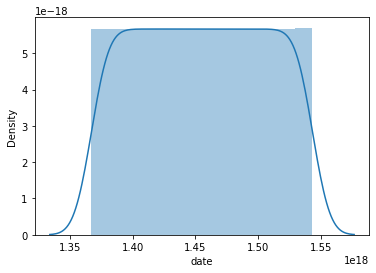

In [749]:
sns.distplot(clean_btc['date'])

<AxesSubplot:xlabel='market', ylabel='Density'>

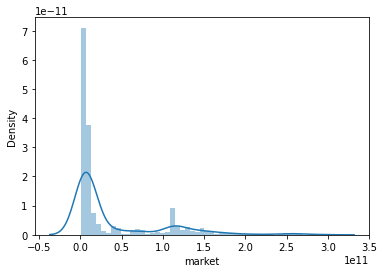

In [750]:
sns.distplot(clean_btc['market'])

<AxesSubplot:xlabel='volume', ylabel='Density'>

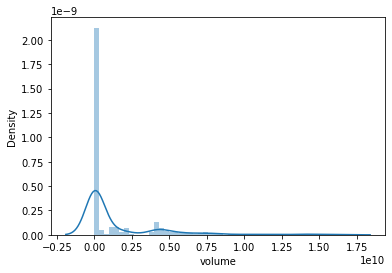

In [751]:
sns.distplot(clean_btc['volume'])

<AxesSubplot:xlabel='high', ylabel='Density'>

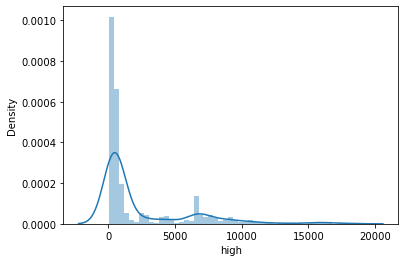

In [752]:
sns.distplot(clean_btc['high'])

<AxesSubplot:xlabel='low', ylabel='Density'>

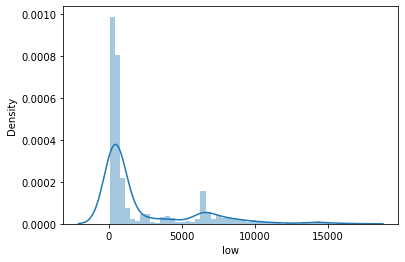

In [753]:
sns.distplot(clean_btc['low'])

In [754]:
clean_df2.to_csv('outlier_df.csv',index=False)

In [755]:
clean_btc2.to_csv('outlier_btc.csv',index=False)